In [128]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import pandas as pd
from matplotlib.patches import Rectangle
import seaborn as sns

In [129]:
X = np.concatenate((np.load('./dataset/labeled_X.npy'), np.load('./dataset/labeled_X_2.npy')), axis=1)

In [130]:
pca = PCA(n_components=2)
X_new = pca.fit_transform(X)
X_new.shape

(3911, 2)

In [2]:
y = pd.read_csv('./dataset/current/train.csv').values[:, 2:]

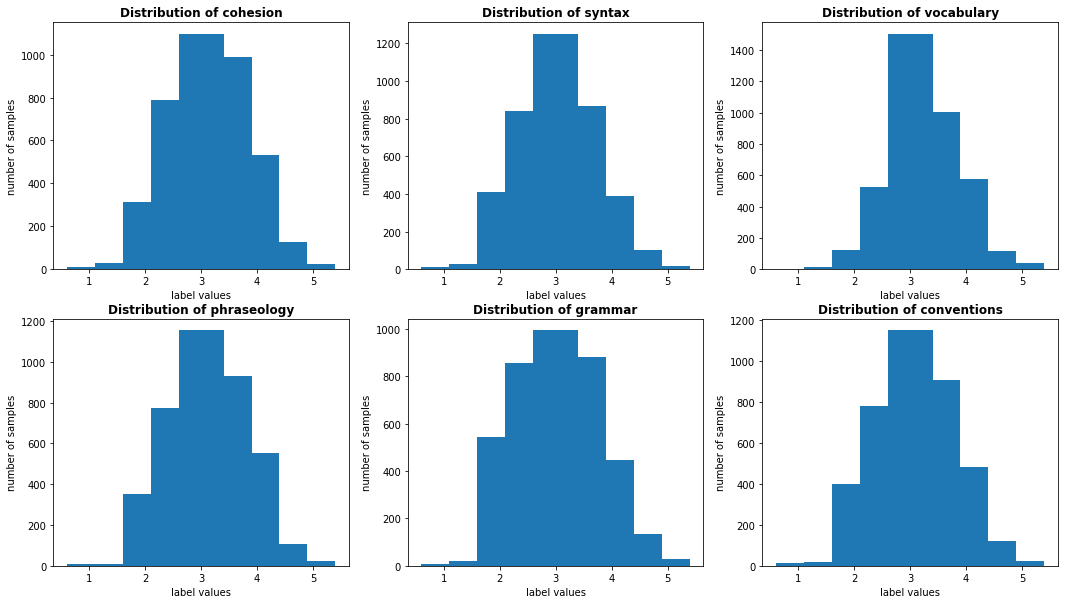

In [153]:
labels = ['cohesion', 'syntax', 'vocabulary', 'phraseology', 'grammar', 'conventions']
plt.figure(figsize=(18, 10))
for i in range(6):
    plt.subplot(2, 3, i+1)
    xi, yi = np.unique(y[:, i], return_counts=True)
    plt.bar(xi, yi)
    plt.xlabel('label values')
    plt.ylabel('number of samples')
    plt.title('Distribution of ' + labels[i], fontsize=12, fontweight='bold')
plt.show()

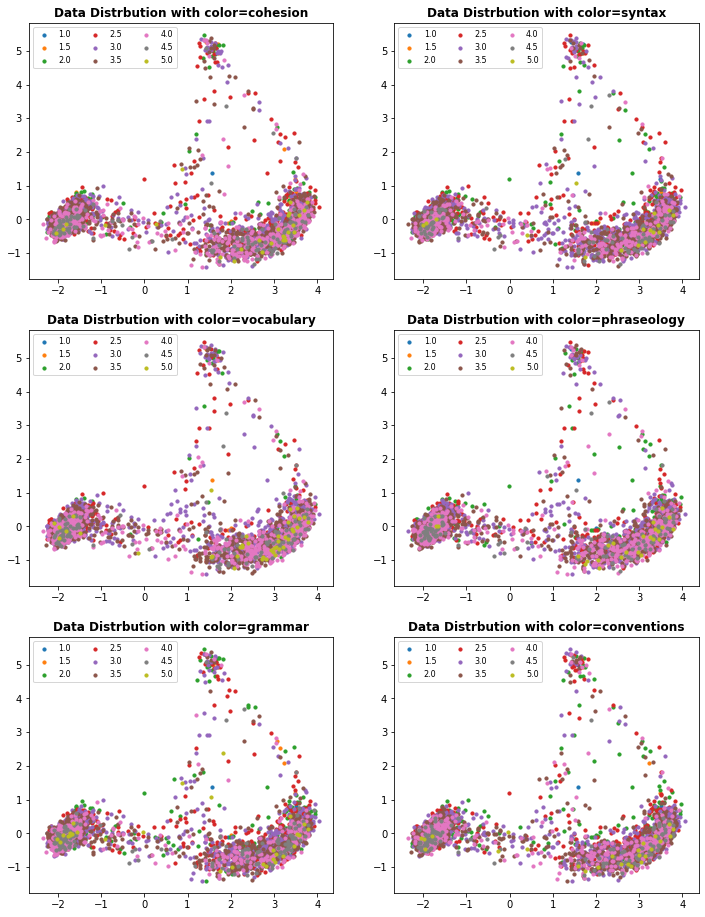

In [149]:
plt.figure(figsize=(12, 16))
for i in range(6):
    plt.subplot(3, 2, i+1)
    for j in list(np.unique(y[:, i])):
        plt.scatter(X_new[y[:, i]==j, 0], X_new[y[:, i]==j, 1], s=10)
    plt.legend(list(np.unique(y[:, i])), scatterpoints=1,
            loc='upper left',
            ncol=3,
            fontsize=8)
    plt.title('Data Distrbution with color=' + labels[i], fontsize=12, fontweight='bold')
plt.show()

In [38]:
pca = PCA(n_components=2)
X_new = pca.fit_transform(X)
X_new.shape

(3911, 1)

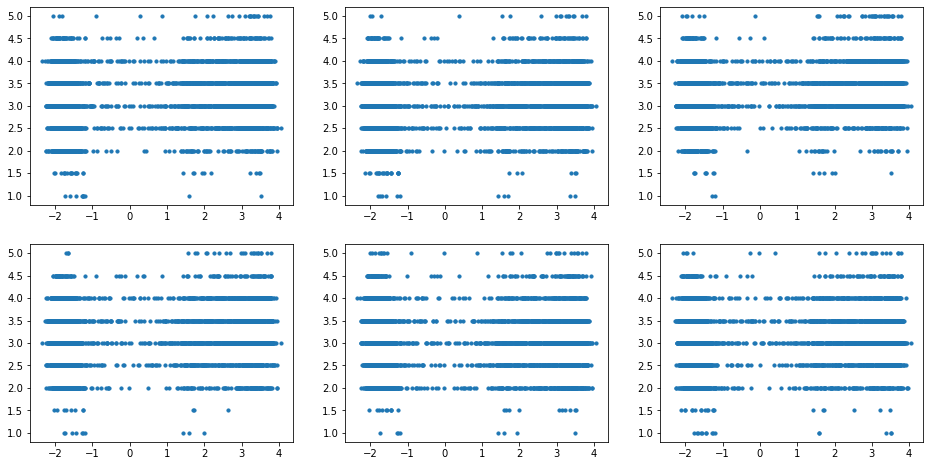

In [46]:
plt.figure(figsize=(16, 8))
for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.scatter(X_new[:, 0], y[:, i], s=10)
plt.show()

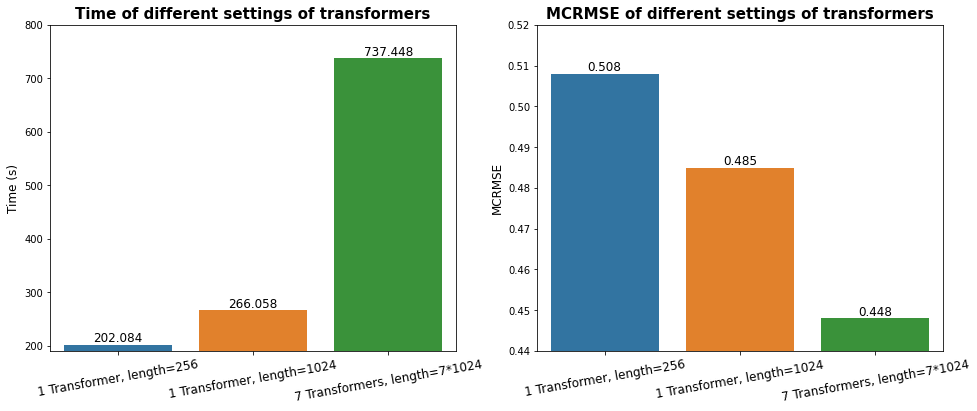

In [105]:
names = ['1 Transformer, length=256', '1 Transformer, length=1024', '7 Transformers, length=7*1024']
time_list = [202.084, 266.058, 737.448]
acc_list = [0.508, 0.485, 0.448]

plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
ax = sns.barplot(x=names, y=time_list)
plt.xticks(rotation=10, fontsize=12)
plt.ylim([190, 800])
plt.ylabel('Time (s)', fontsize=12)
ax.bar_label(ax.containers[0], fontsize=12)
plt.title('Time of different settings of transformers', fontsize=15, fontweight='bold')

plt.subplot(1, 2, 2)
ax = sns.barplot(x=names, y=acc_list)
plt.xticks(rotation=10, fontsize=12)
plt.ylim([0.44, 0.52])
plt.ylabel('MCRMSE', fontsize=12)
ax.bar_label(ax.containers[0], fontsize=12)
plt.title('MCRMSE of different settings of transformers', fontsize=15, fontweight='bold')
plt.show()

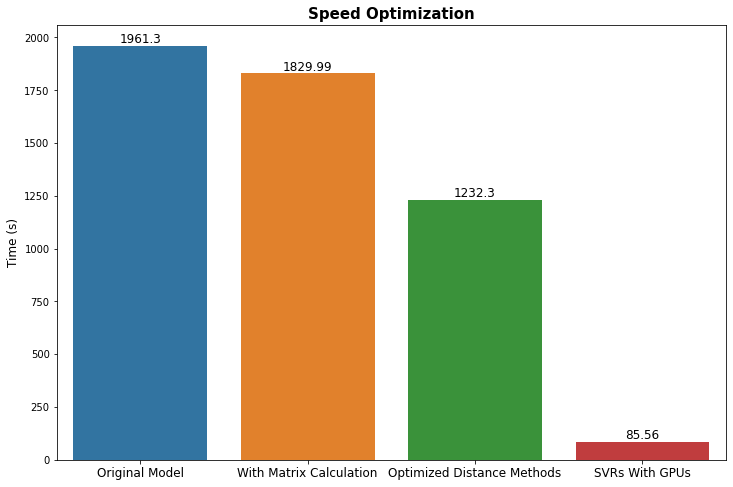

In [154]:
names = ['Original Model', 'With Matrix Calculation', 
         'Optimized Distance Methods', 'SVRs With GPUs']
time_list = [1961.302, 1829.992, 1232.299, 85.560]

plt.figure(figsize=(12, 8))
ax = sns.barplot(x=names, y=time_list)
plt.xticks(fontsize=12)
plt.ylabel('Time (s)', fontsize=12)
plt.title('Speed Optimization', fontsize=15, fontweight='bold')
ax.bar_label(ax.containers[0], fontsize=12)
plt.show()

In [63]:
import itertools
p = [[5, 10, 15], [10, 20, 30], [10, 100, 1000], [0.1, 1]]
ps = list(itertools.product(*p))

In [81]:
ps[27]

(10, 20, 100, 1)

In [80]:
res = [0.47425825524375836, 0.4418738025667774, 0.47426243101374327, 0.4418698207802199, 0.4742611438028506, 0.44188787406798746, 0.47427272671088216, 0.4418041068808267, 0.4742700297248219, 0.4417847511880125, 0.4742637631972256, 0.44178800255237677, 0.47423668168696953, 0.44173638743405513, 0.4742200393139851, 0.44173329393182803, 0.47423499645966, 0.44172800201948903, 0.47349523932071597, 0.44155912067877445, 0.473565195362901, 0.4415732040375302, 0.4735092761735615, 0.4415529489751033, 0.47351693562963965, 0.44154049763810965, 0.4735165855185401, 0.4415399231624243, 0.47351866060986836, 0.4415406912109276, 0.47349484869702013, 0.4415423564300147, 0.47350046212261343, 0.44154569759831874, 0.4734951750671795, 0.4415463612103273, 0.4733255405174407, 0.4416196411125757, 0.47332201503515897, 0.44160944843788735, 0.47332624718395544, 0.4416030285798754, 0.473267718304279, 0.4415435185947289, 0.473270044395763, 0.44155007409779873, 0.4732727141925719, 0.44154810487374463, 0.4732767799098018, 0.44154099207313485, 0.4732698165511993, 0.4415440615494018, 0.473279836888337, 0.4415529222577632]
np.argmin(res)

27

In [84]:
order = np.argsort(res)
res = np.array(res)
psi = np.array([str(pi) for pi in ps])
psi[order]

array(['(10, 20, 100, 1)', '(10, 20, 10, 1)', '(10, 20, 1000, 1)',
       '(15, 30, 10, 1)', '(10, 30, 10, 1)', '(15, 20, 10, 1)',
       '(15, 30, 100, 1)', '(10, 30, 100, 1)', '(10, 30, 1000, 1)',
       '(15, 20, 1000, 1)', '(15, 20, 100, 1)', '(15, 30, 1000, 1)',
       '(10, 10, 1000, 1)', '(10, 10, 10, 1)', '(10, 10, 100, 1)',
       '(15, 10, 1000, 1)', '(15, 10, 100, 1)', '(15, 10, 10, 1)',
       '(5, 30, 1000, 1)', '(5, 30, 100, 1)', '(5, 30, 10, 1)',
       '(5, 20, 100, 1)', '(5, 20, 1000, 1)', '(5, 20, 10, 1)',
       '(5, 10, 100, 1)', '(5, 10, 10, 1)', '(5, 10, 1000, 1)',
       '(15, 20, 10, 0.1)', '(15, 30, 100, 0.1)', '(15, 20, 100, 0.1)',
       '(15, 20, 1000, 0.1)', '(15, 30, 10, 0.1)', '(15, 30, 1000, 0.1)',
       '(15, 10, 100, 0.1)', '(15, 10, 10, 0.1)', '(15, 10, 1000, 0.1)',
       '(10, 30, 10, 0.1)', '(10, 30, 1000, 0.1)', '(10, 10, 10, 0.1)',
       '(10, 30, 100, 0.1)', '(10, 10, 1000, 0.1)', '(10, 20, 100, 0.1)',
       '(10, 20, 10, 0.1)', '(10, 20, 100

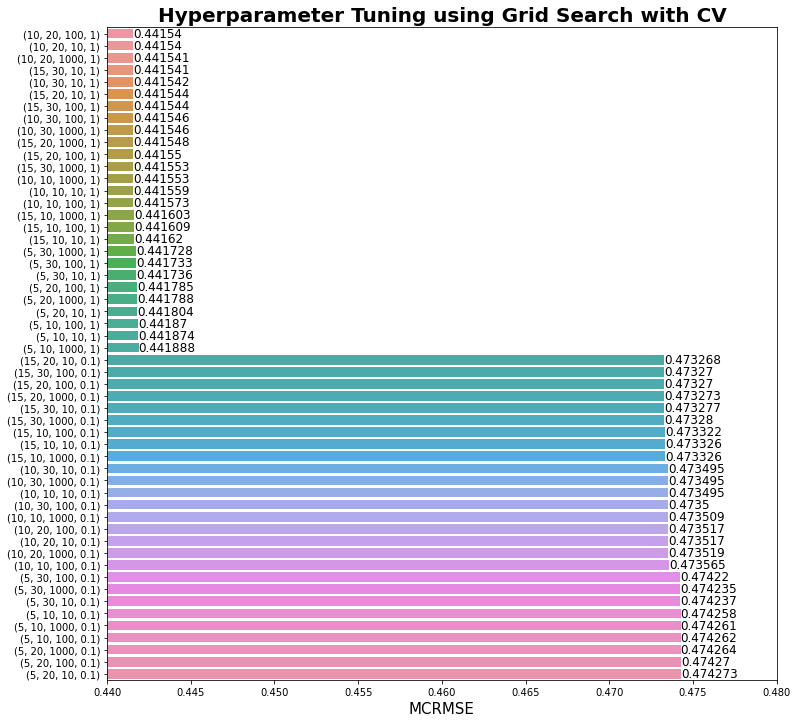

In [113]:
plt.figure(figsize=(12, 12))
ax = sns.barplot(y=psi[order], x=res[order], orient = 'h')
plt.xlabel('MCRMSE', fontsize=15)
plt.xlim([0.44, 0.48])
plt.title('Hyperparameter Tuning using Grid Search with CV', fontsize=20, fontweight='bold')
ax.bar_label(ax.containers[0], fontsize=12)
plt.show()